# Objectives of this Lab
- understand regularized regression
- understand choice of hyperparameters
- understand need for feature scaling

## Reminders
- activate your hsi25_ml-ssc_25.0 conda env (kernel)

# import modules we'll use
- note a few new ones (`KFold`, `StandardScaler`, `Lasso`, `Ridge`)

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import warnings

from sklearn.model_selection import train_test_split, KFold

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor, plot_tree

warnings.filterwarnings("ignore", message="This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.")
warnings.filterwarnings("ignore", message="result may not be accurate.")
warnings.filterwarnings("ignore", message="Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation.")
plt.style.use('../files/plot_style.mplstyle')


In [2]:
def root_mean_square_error(y_actual, y_pred):
    return (np.mean([(y_actual[i] - y_pred[i])**2 for i in range(len(y_actual))]))**0.5

## Let's explore "scaling" our features
- improves gradient descent optimization
- improves principal component analysis
- affects any model that uses "distances" during training
    - regularized regression
    - neural networks
    - others

### One type of scaling is "standard" scaling
- take your training dataset, and transform each feature such that the mean = 0 and the std = 1
- implemented in `sklearn.preprocessing.StandardScaler`

## What does standard scaler do? What kind of transformation is this?

\begin{align}
x_{i,scaled} = \frac{x_i - \mu_x}{\sigma_x} = \frac{1}{\sigma_x} x_i - \frac{\mu_x}{\sigma_x}
\end{align}
$\mu$ = mean, $\sigma$ = variance

In [3]:
df = pd.read_csv(os.path.join('..', 'data', 'Al_cmpds.csv'))

for col in ['G', 'H', 'S']:
    df[col] = df[col] * 1000

for n in range(2, 5):
    df['T^%s' % str(int(n))] = df['T']**n

features = ['T'] + [k for k in list(df) if '^' in k] + ['S']
print(features)

['T', 'T^2', 'T^3', 'T^4', 'S']


In [4]:
features = ['T', 'T^2']
X = df[features].values
y = df['G'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44)

**You must fit your scaler only on your training data!** Otherwise, you are leaking information about your dataset distribution into the excluded test set
- similarly, when you're doing cross-validation (scale on training; don't let anything see your validation set). the purpose of validation is to mimic "real-world" application of your trained model (where you don't know the "answer")

In [5]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

Similar to how most `sklearn` *models* have `.fit` and `.predict` methods. Scalers (and other `sklearn` *preprocessing* approaches) have `.fit` and `.transform` methods

In [6]:
X_train_scaled = scaler.transform(X_train)

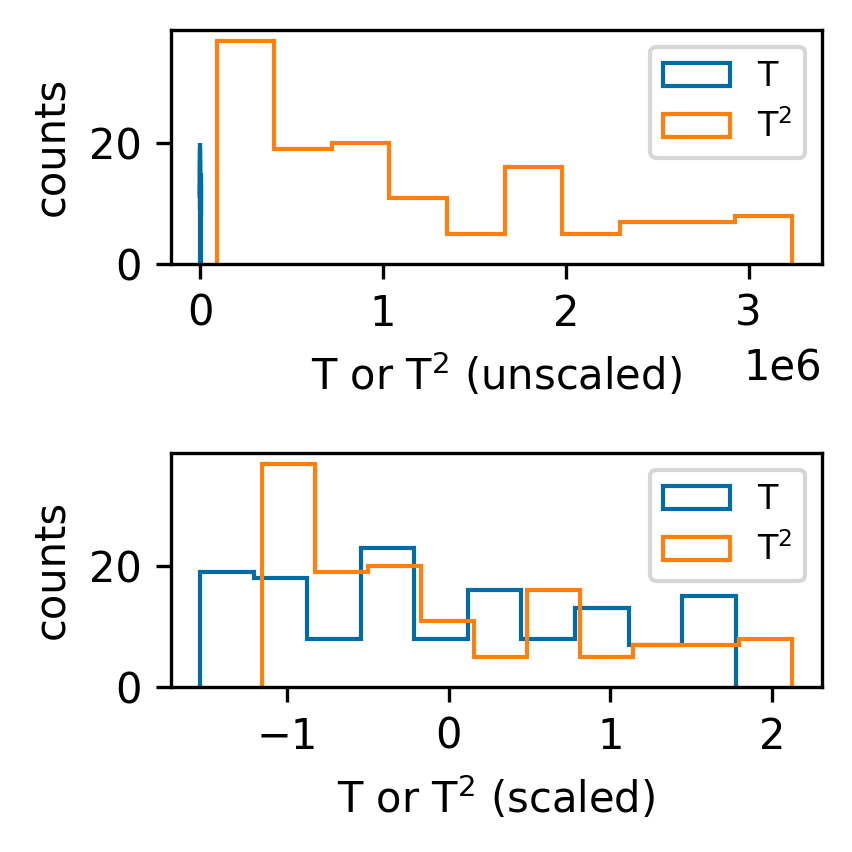

In [7]:
fig = plt.figure(figsize=(3,3))
ax = plt.subplot(211)
labels = ['T', '$T^2$']
for i in [0, 1]:
    ax = plt.hist(X_train[:, i], label=labels[i], histtype='step')
ax = plt.legend()
ax = plt.ylabel('counts')
ax = plt.xlabel('T or $T^2$ (unscaled)')
ax = plt.subplot(212)
labels = ['T', '$T^2$']
for i in [0, 1]:
    ax = plt.hist(X_train_scaled[:, i], label=labels[i], histtype='step')
ax = plt.legend()
ax = plt.ylabel('counts')
ax = plt.xlabel('T or $T^2$ (scaled)')

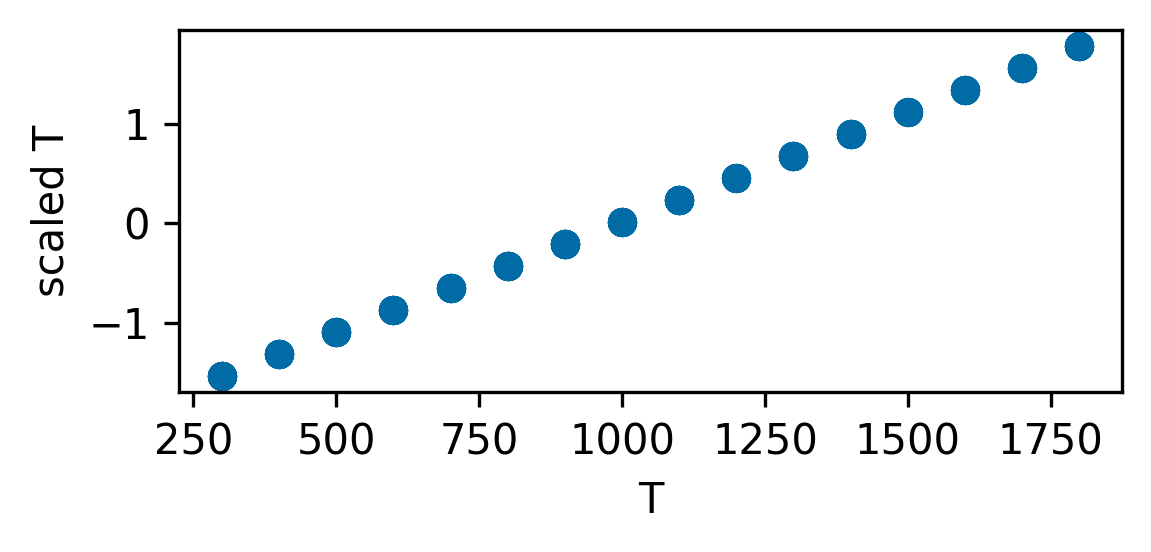

In [8]:
fig = plt.figure()
ax = plt.subplot(111)
T = X_train[:, 0]
T_scaled = X_train_scaled[:, 0]

ax = plt.scatter(T, T_scaled)
ax = plt.xlabel('T')
ax = plt.ylabel('scaled T')

## Compare Ridge (L2-reg regression) w/ and w/o scaling

In [9]:
print('---- without scaling ----')
model = Ridge()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
print(root_mean_square_error(y_train, y_train_pred))

print('\n---- with scaling ----')
model = Ridge()
model.fit(X_train_scaled, y_train)
y_train_pred = model.predict(X_train_scaled)
print(root_mean_square_error(y_train, y_train_pred))

---- without scaling ----
74.16541830453667

---- with scaling ----
74.1808864119273


## That was on the training set, but what about the test set?

In [10]:
y_test_pred = model.predict(X_test)
print(root_mean_square_error(y_test, y_test_pred))

103174965.20608987


# AGH!

# **Reminder**: anything you do to the training set, you should also do to the validation/test set
- sometimes referred to as a preprocessing pipeline
- after scaling our test set using the same linear transformation that was identified for the training set, we now get low test set errors as well

In [11]:
X_test_scaled = scaler.transform(X_test)
y_test_pred = model.predict(X_test_scaled)
print(root_mean_square_error(y_test, y_test_pred))

63.94796669562292


### Now, you'll get to explore the effect of the regularization parameter

# Group activity
**Guidelines**:
- play with the `Lasso` model (L1 instead of L2 norm, just for fun)
- fit models using three features: `T`, `T^2`, `H`
- use scaled features
- vary the regularization parameter (`alpha`)
- generate a plot that helps you understand how alpha influences:
  - the magnitude of the learned coefficients in the model
  - the performance of the model on the training set

In [12]:
# add your code here


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


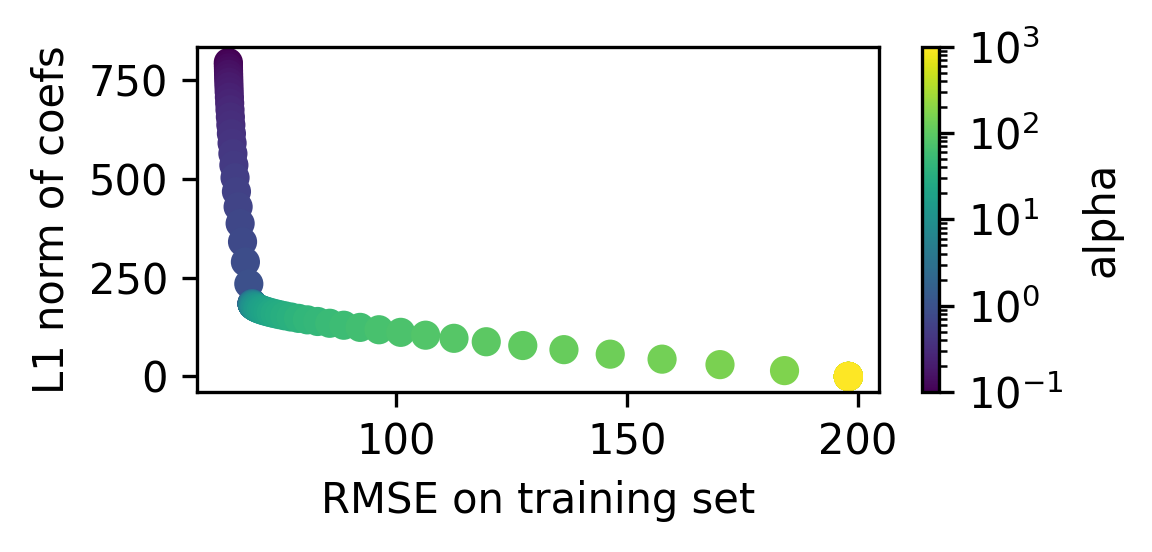